# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

### Gabi Rivera || ADS501-01 || 12Sep2022

#### Data Pre-Processing: Data Importing

In [1]:
import os
os.getcwd()

'/Users/gabirivera/Desktop/MSADS2/ADS-501-01/Project/Data'

In [2]:
import pandas as pd

In [3]:
fs = pd.read_csv('Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_-_Training_Features.csv', sep = ',')
fs.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

In [5]:
fs.isnull().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

#### Data Pre-Processing: Identify Missing Data

In [6]:
import klib

GridSpec(6, 6)

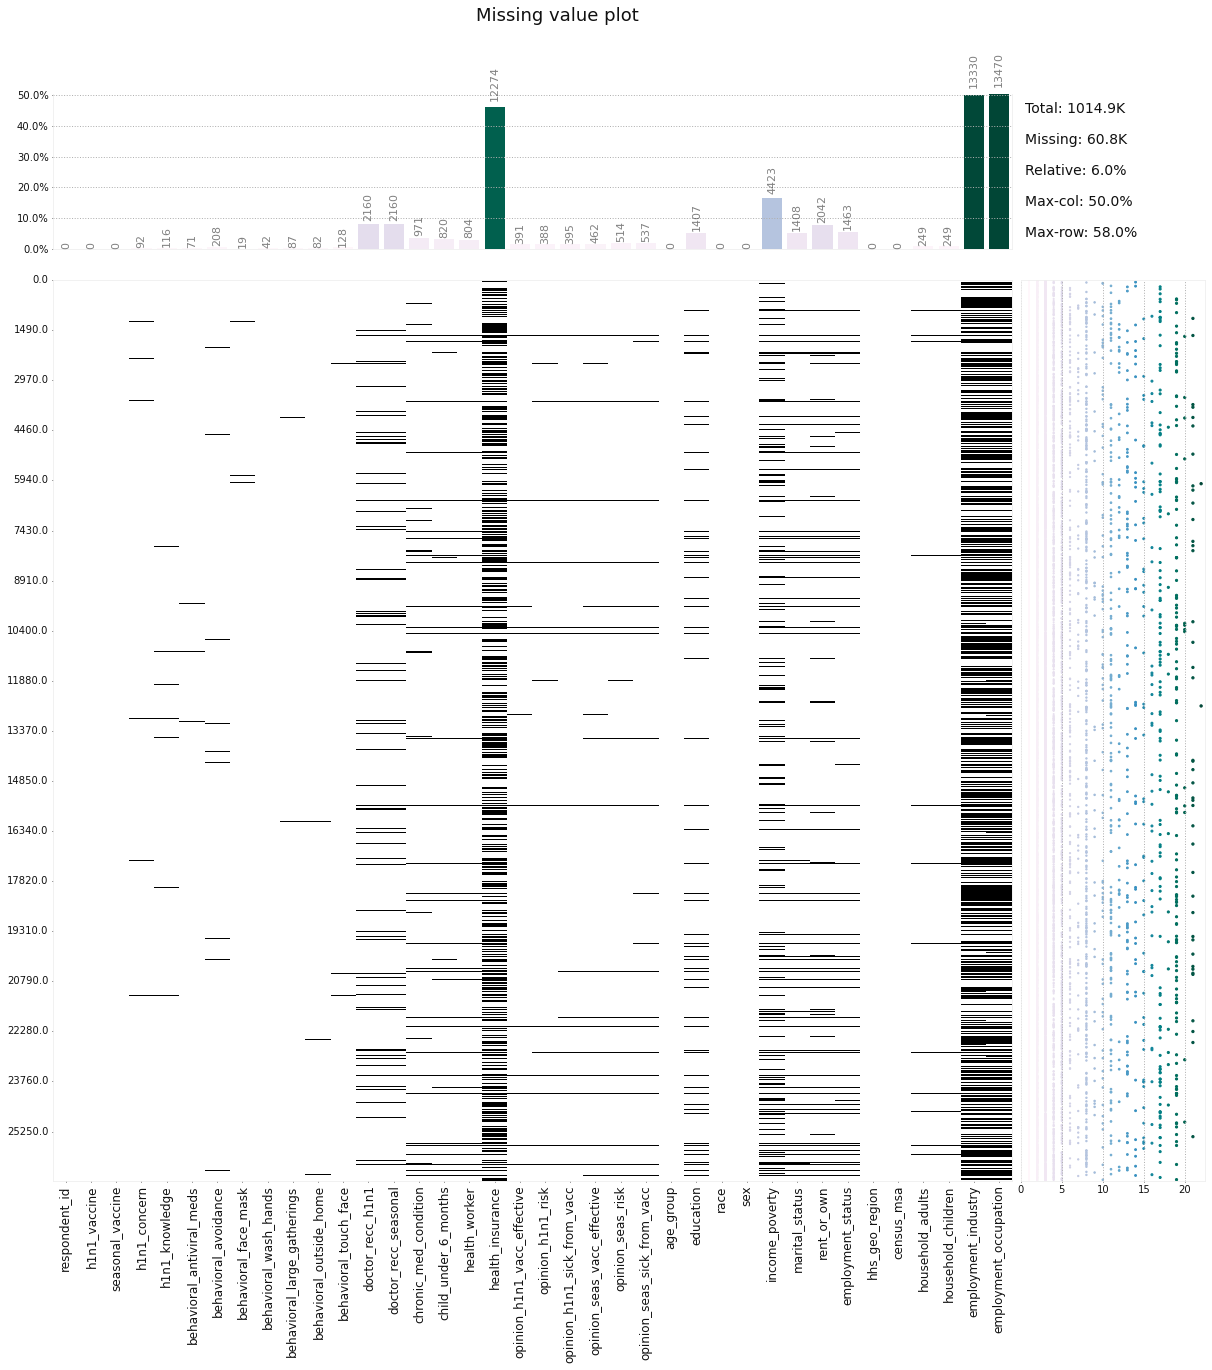

In [8]:
klib.missingval_plot(fs)

In [25]:
lossDropna = 1 - fs.dropna().shape[0] / fs.shape[0]
print(f"Removing all missing data will result to {round(100*lossDropna, 2)}% data loss.")

Removing all missing data will result to 75.9% data loss.


In [9]:
fs_cleaned = klib.data_cleaning(fs)

Long column names detected (>25 characters). Consider renaming the following columns ['behavioral_large_gatherings', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_sick_from_vacc'].
Shape of cleaned data: (26707, 38) - Remaining NAs: 60762


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 4.99 MB (-64.47%)



##### Missing Data: MICE Imputation

Missing data imputed using R MICE package. For method, random forest was applied to all features with NAs to complete dataset.  

In [10]:
c_fs = pd.read_csv('H1N1_and_Seasonal_Flu_Vaccines_-_Training_Features.csv', sep = ',')
c_fs.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,False,False,1,0,False,False,False,False,False,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,xqicxuve,uqqtjvyb
1,1,False,True,3,2,False,True,False,True,False,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe
2,2,False,False,1,1,False,True,False,False,False,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo
3,3,False,True,1,1,False,True,False,True,True,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,atmlpfrs,hfxkjkmi
4,4,False,False,2,1,False,True,False,True,True,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb


In [11]:
c_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                26707 non-null  int64 
 1   h1n1_vaccine                 26707 non-null  bool  
 2   seasonal_vaccine             26707 non-null  bool  
 3   h1n1_concern                 26707 non-null  int64 
 4   h1n1_knowledge               26707 non-null  int64 
 5   behavioral_antiviral_meds    26707 non-null  bool  
 6   behavioral_avoidance         26707 non-null  bool  
 7   behavioral_face_mask         26707 non-null  bool  
 8   behavioral_wash_hands        26707 non-null  bool  
 9   behavioral_large_gatherings  26707 non-null  bool  
 10  behavioral_outside_home      26707 non-null  bool  
 11  behavioral_touch_face        26707 non-null  bool  
 12  doctor_recc_h1n1             26707 non-null  bool  
 13  doctor_recc_seasonal         26

In [12]:
klib.missingval_plot(c_fs)

No missing values found in the dataset.


#### Data Exploration: Data Distribution

In [29]:
c_fs['h1n1_vaccine'] = c_fs['h1n1_vaccine'].astype('float64')
c_fs['seasonal_vaccine'] = c_fs['seasonal_vaccine'].astype('float64')
c_fs['behavioral_antiviral_meds'] = c_fs['behavioral_antiviral_meds'].astype('float64')
c_fs['behavioral_avoidance'] = c_fs['behavioral_avoidance'].astype('float64')
c_fs['behavioral_face_mask'] = c_fs['behavioral_face_mask'].astype('float64')
c_fs['behavioral_wash_hands'] = c_fs['behavioral_wash_hands'].astype('float64')
c_fs['behavioral_large_gatherings'] = c_fs['behavioral_large_gatherings'].astype('float64')
c_fs['behavioral_outside_home'] = c_fs['behavioral_outside_home'].astype('float64')
c_fs['behavioral_touch_face'] = c_fs['behavioral_touch_face'].astype('float64')
c_fs['doctor_recc_h1n1'] = c_fs['doctor_recc_h1n1'].astype('float64')
c_fs['doctor_recc_seasonal'] = c_fs['doctor_recc_seasonal'].astype('float64')
c_fs['chronic_med_condition'] = c_fs['chronic_med_condition'].astype('float64')
c_fs['child_under_6_months'] = c_fs['child_under_6_months'].astype('float64')
c_fs['health_worker'] = c_fs['health_worker'].astype('float64')
c_fs['health_insurance'] = c_fs['health_insurance'].astype('float64')
c_fs.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,xqicxuve,uqqtjvyb
1,1,0.0,1.0,3,2,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe
2,2,0.0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo
3,3,0.0,1.0,1,1,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,atmlpfrs,hfxkjkmi
4,4,0.0,0.0,2,1,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb


In [30]:
c_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  float64
 2   seasonal_vaccine             26707 non-null  float64
 3   h1n1_concern                 26707 non-null  int64  
 4   h1n1_knowledge               26707 non-null  int64  
 5   behavioral_antiviral_meds    26707 non-null  float64
 6   behavioral_avoidance         26707 non-null  float64
 7   behavioral_face_mask         26707 non-null  float64
 8   behavioral_wash_hands        26707 non-null  float64
 9   behavioral_large_gatherings  26707 non-null  float64
 10  behavioral_outside_home      26707 non-null  float64
 11  behavioral_touch_face        26707 non-null  float64
 12  doctor_recc_h1n1             26707 non-null  float64
 13  doctor_recc_seas

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


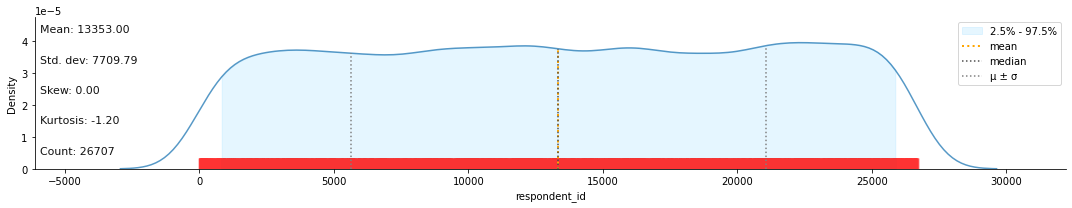

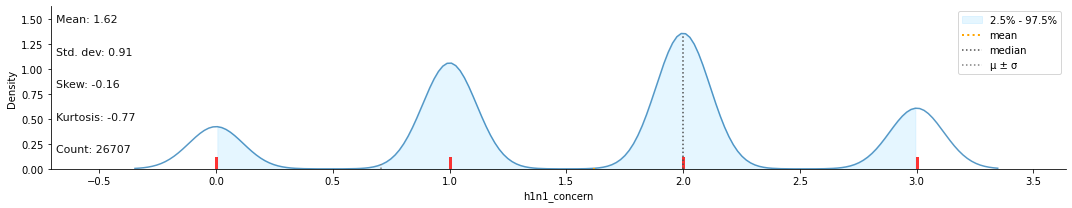

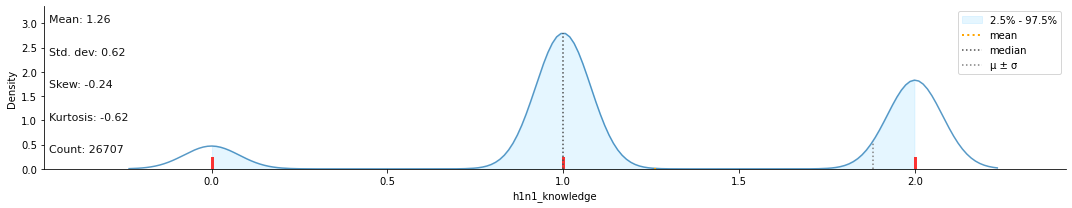

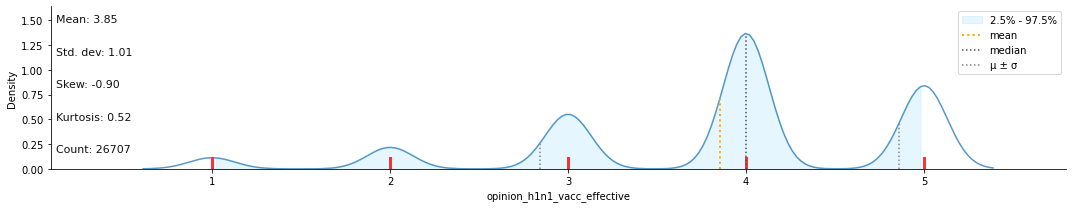

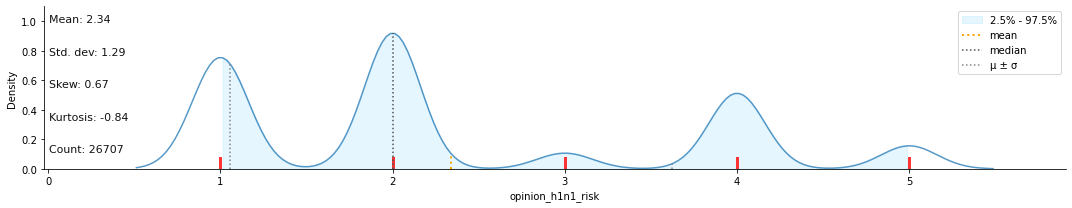

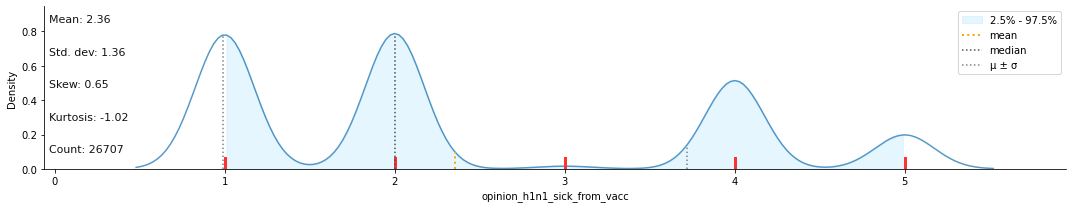

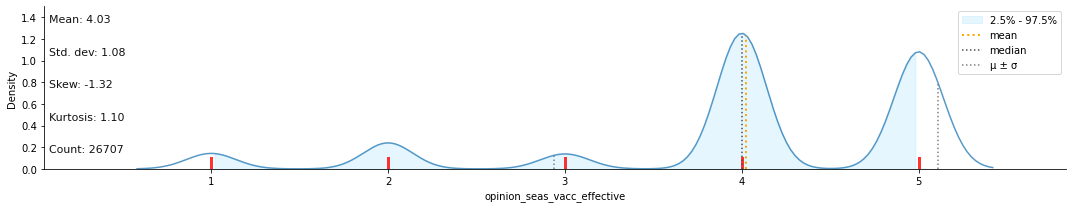

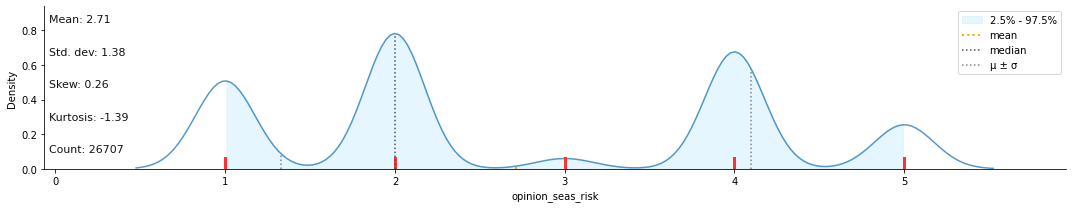

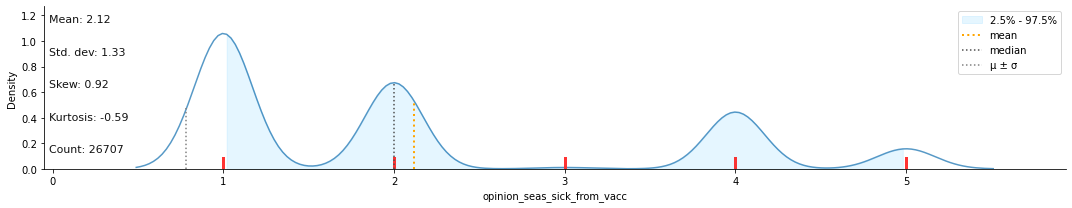

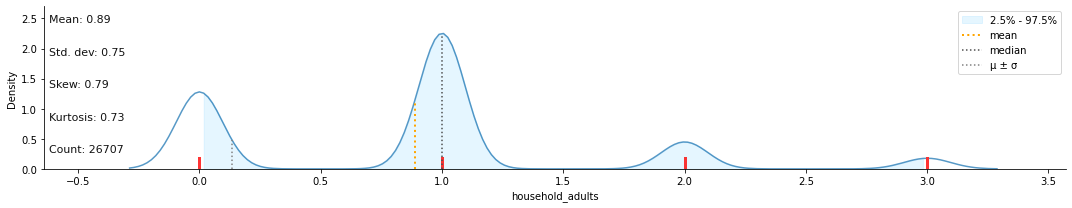

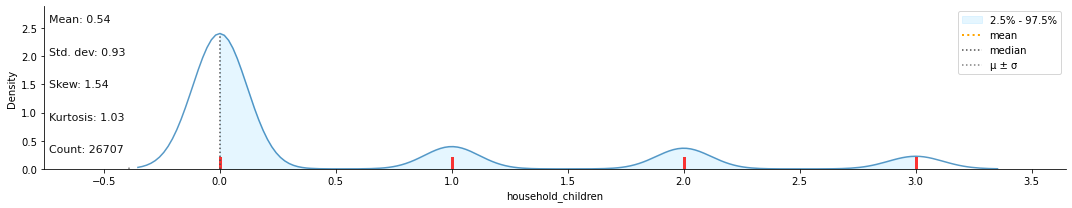

In [31]:
klib.dist_plot(c_fs)
plt.savefig('sample.pdf')

GridSpec(6, 12)

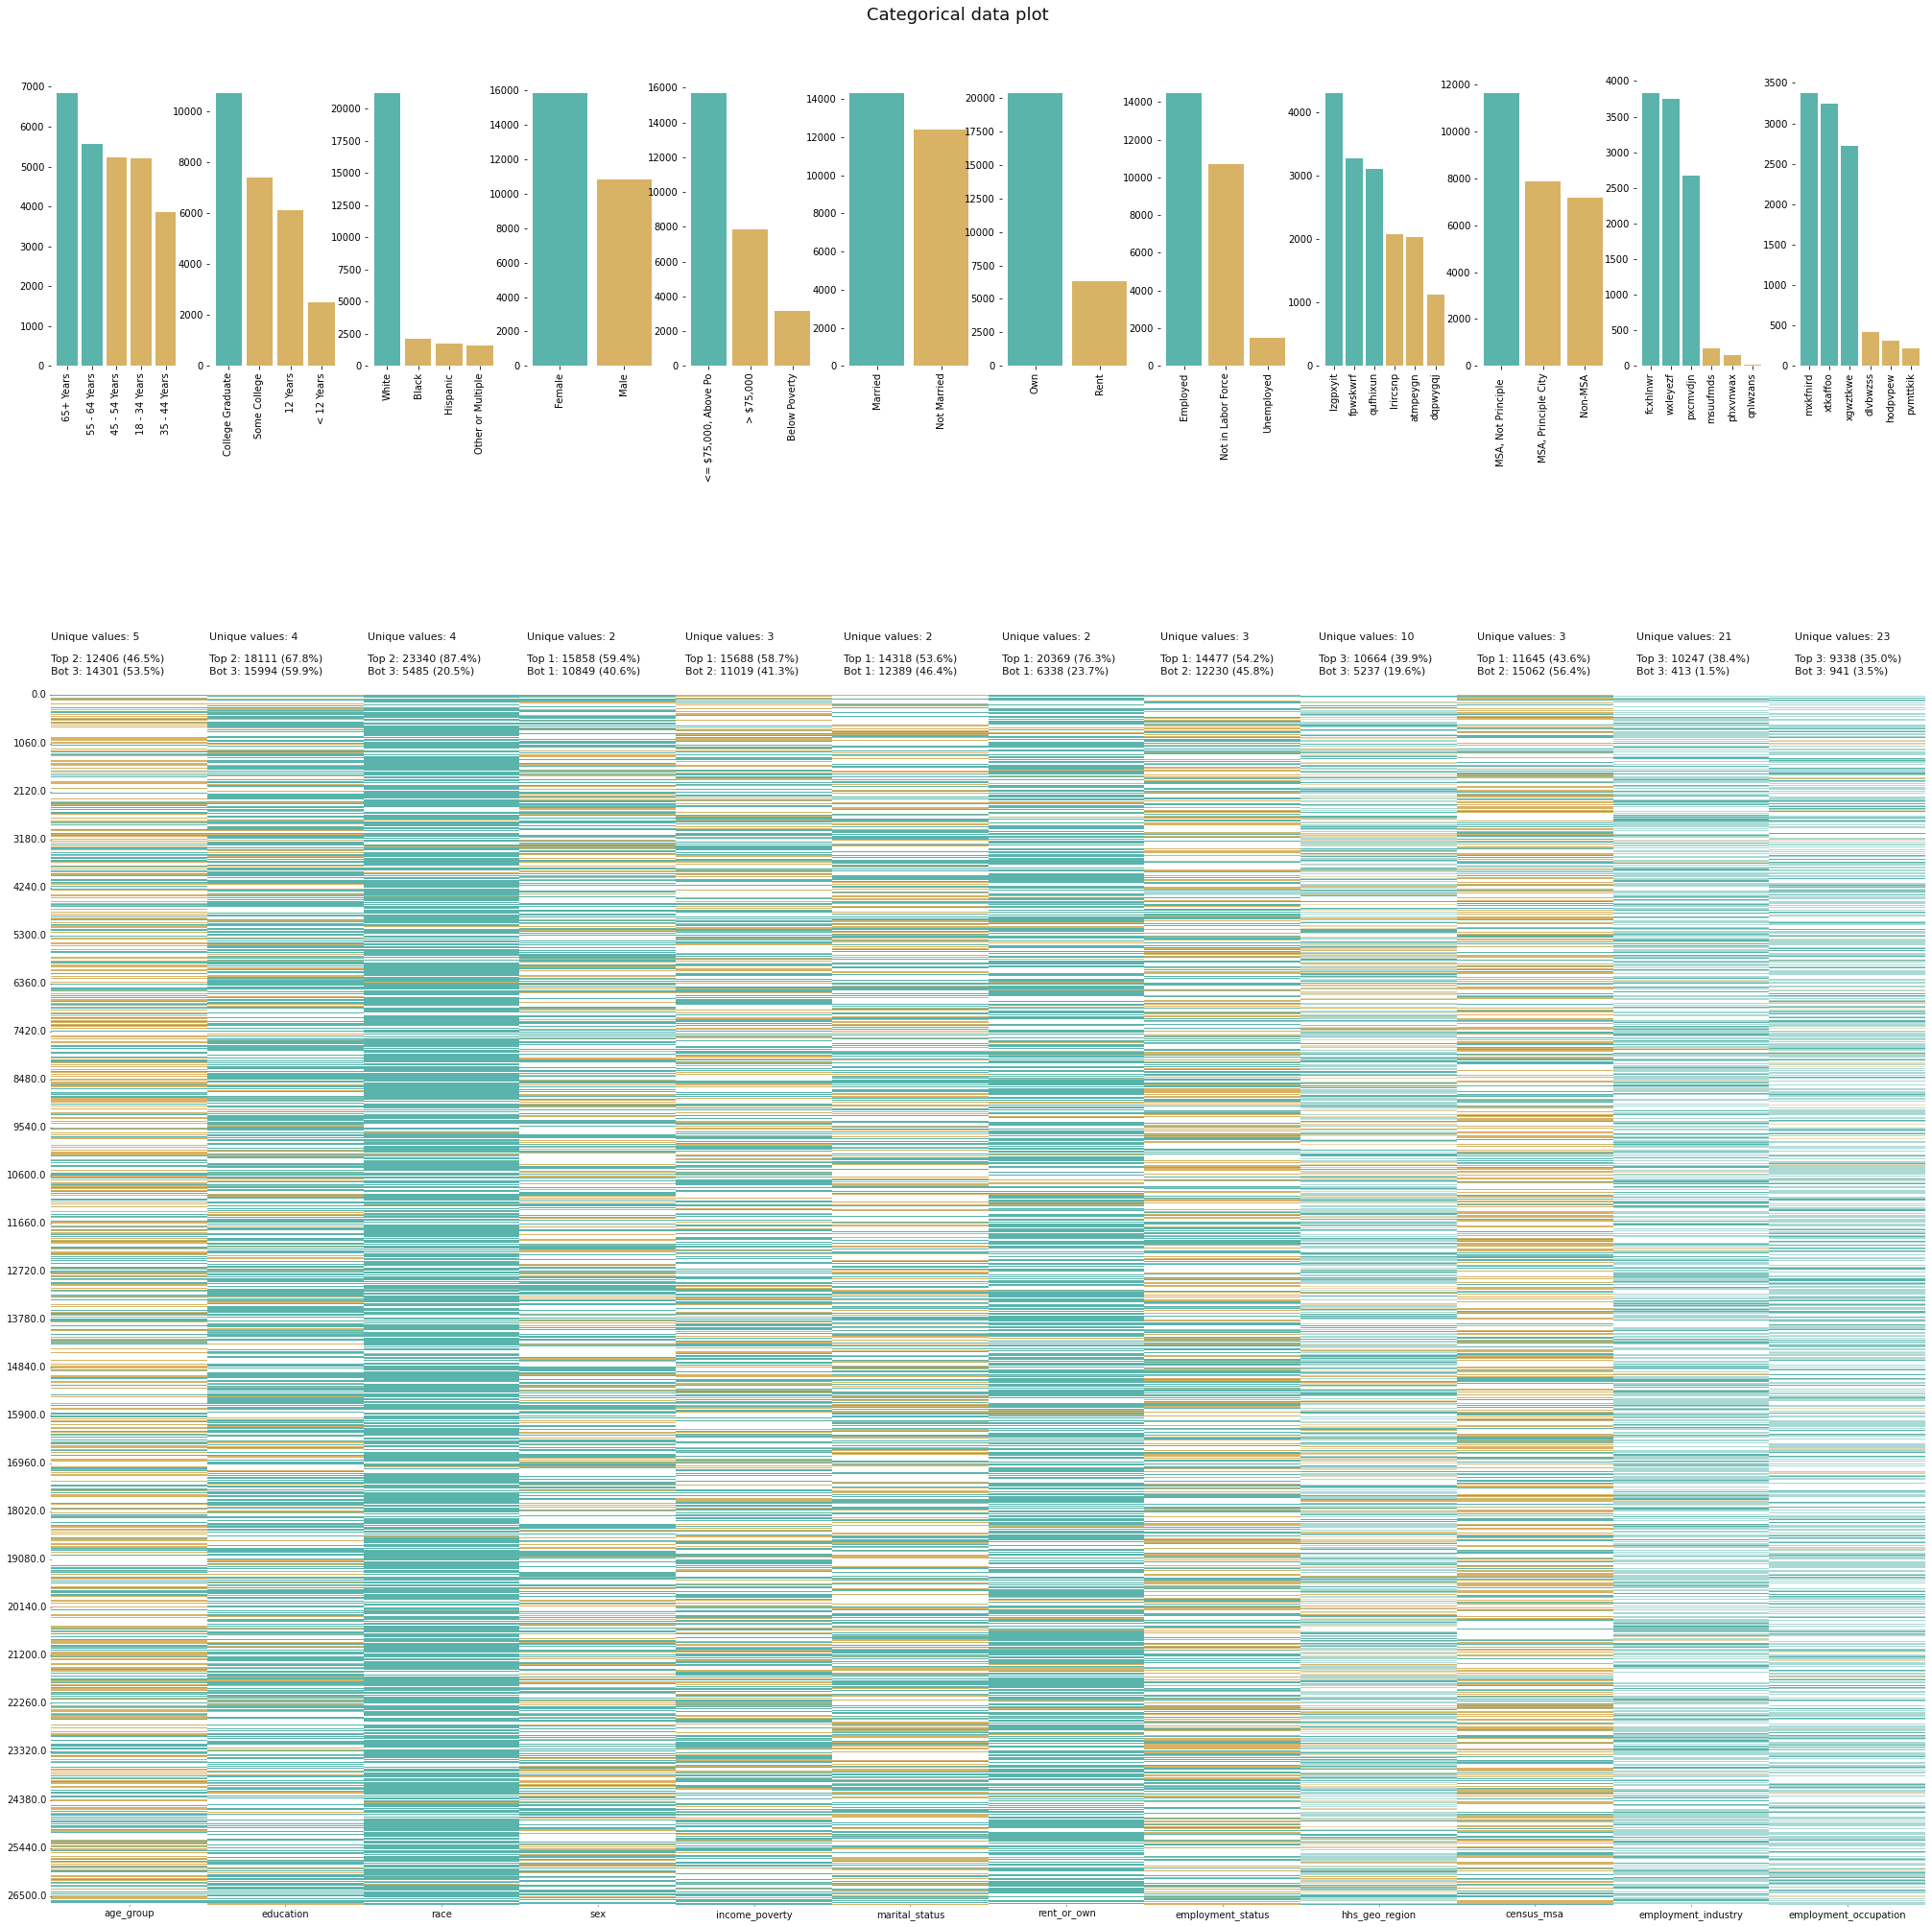

In [37]:
klib.cat_plot(c_fs, figsize = (35,35))

#### Data Exploration: Relationship Analysis

In [20]:
from dython.nominal import associations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from sklearn import datasets

In [21]:
d_fs =c_fs.drop(columns=["respondent_id"], axis = 1)
d_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  float64
 1   seasonal_vaccine             26707 non-null  float64
 2   h1n1_concern                 26707 non-null  int64  
 3   h1n1_knowledge               26707 non-null  int64  
 4   behavioral_antiviral_meds    26707 non-null  float64
 5   behavioral_avoidance         26707 non-null  float64
 6   behavioral_face_mask         26707 non-null  float64
 7   behavioral_wash_hands        26707 non-null  float64
 8   behavioral_large_gatherings  26707 non-null  float64
 9   behavioral_outside_home      26707 non-null  float64
 10  behavioral_touch_face        26707 non-null  float64
 11  doctor_recc_h1n1             26707 non-null  float64
 12  doctor_recc_seasonal         26707 non-null  float64
 13  chronic_med_cond

Dython library calculates correlation between categorical variables. 
Method applied is Theil U.              

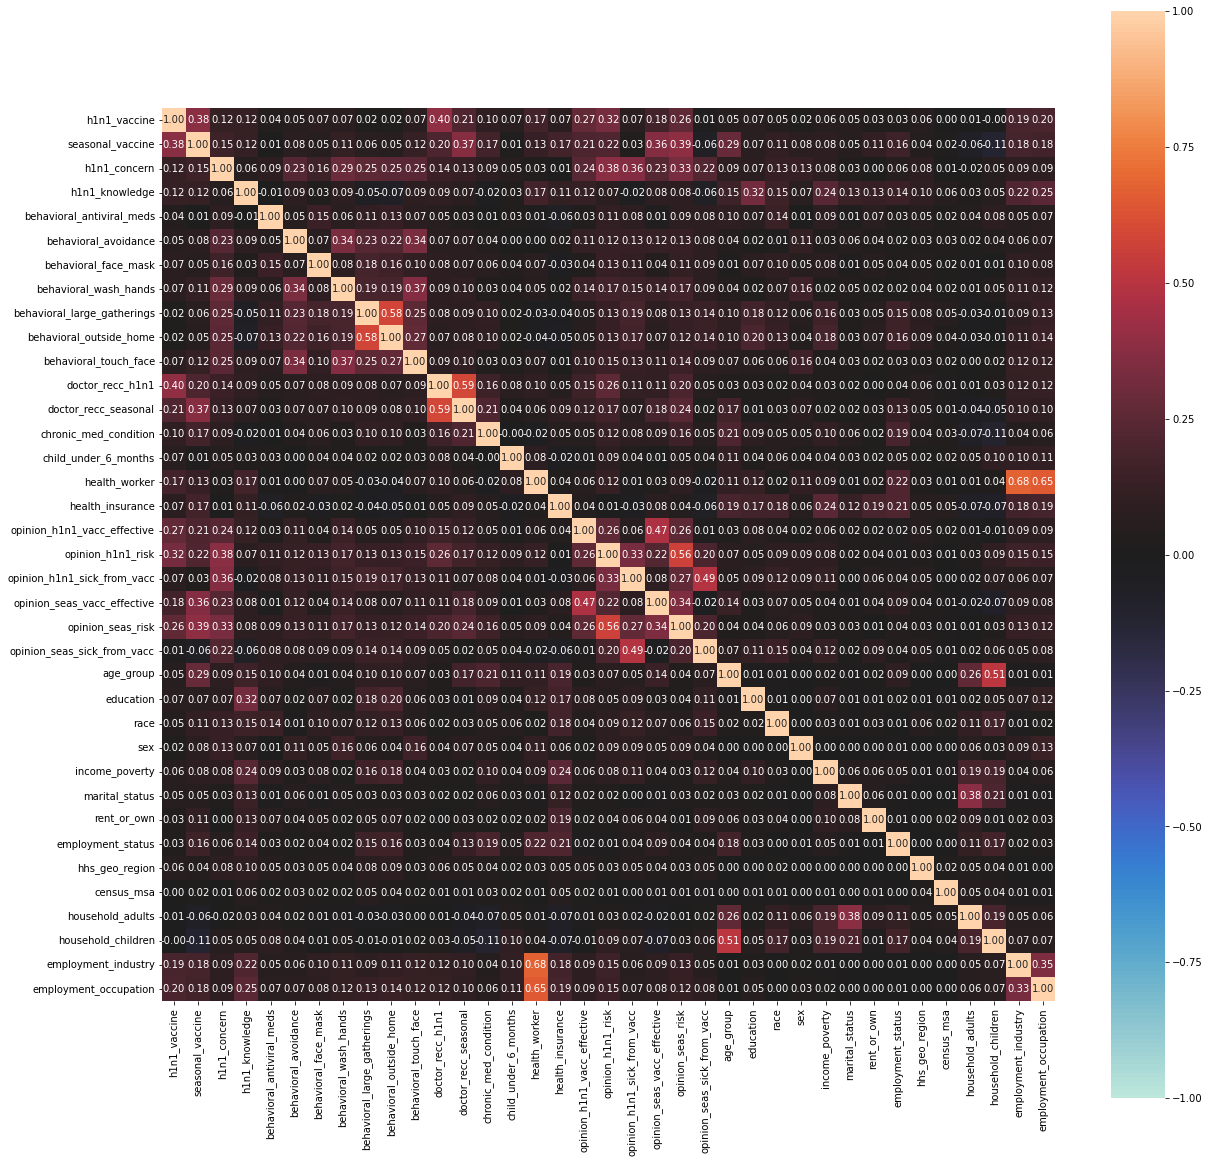

{'corr':                              h1n1_vaccine  seasonal_vaccine  h1n1_concern  \
 h1n1_vaccine                     1.000000          0.377143      0.121503   
 seasonal_vaccine                 0.377143          1.000000      0.154655   
 h1n1_concern                     0.121503          0.154655      1.000000   
 h1n1_knowledge                   0.118121          0.120376      0.061218   
 behavioral_antiviral_meds        0.040441          0.006381      0.090630   
 behavioral_avoidance             0.047771          0.077382      0.233732   
 behavioral_face_mask             0.070413          0.050020      0.156117   
 behavioral_wash_hands            0.074598          0.112354      0.292776   
 behavioral_large_gatherings      0.017037          0.063781      0.254498   
 behavioral_outside_home          0.021659          0.053542      0.246902   
 behavioral_touch_face            0.071845          0.119719      0.247263   
 doctor_recc_h1n1                 0.395586          0.20

In [24]:
associations(d_fs, nom_nom_assoc = "theil", multiprocessing = True, figsize = (20,20))

Opinions on H1N1 and Seasonal flu vaccine effectiveness by having health insurance.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective

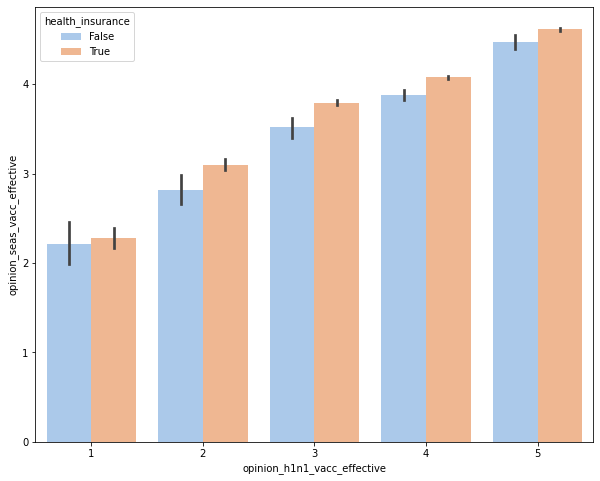

In [27]:
sns.barplot(data= d_fs,x = 'opinion_h1n1_vacc_effective', y = 'opinion_seas_vacc_effective', 
            hue = 'health_insurance', palette = "pastel")
plt.gcf().set_size_inches(10, 8)

Cautious behavior and having insurance.

(Reducing contact with people outside of own household)
(Has frequently washed hands or used hand sanitizer)

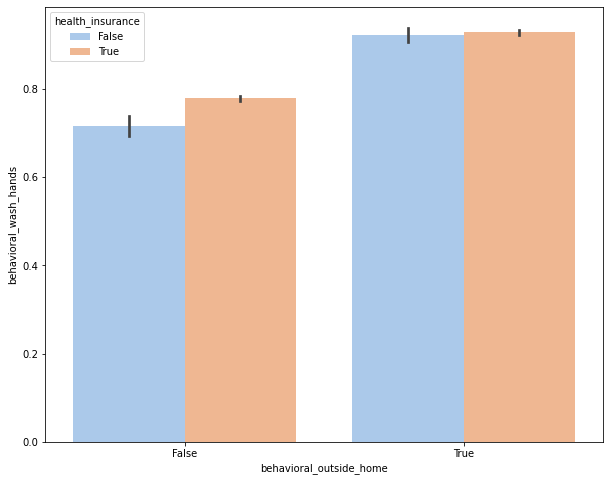

In [92]:
sns.barplot(data= d_fs,x = 'behavioral_outside_home', y = 'behavioral_wash_hands', 
            hue = 'health_insurance', palette = "pastel")
plt.gcf().set_size_inches(10, 8)

H1N1: washing hands behavior vs risk opinion

1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high

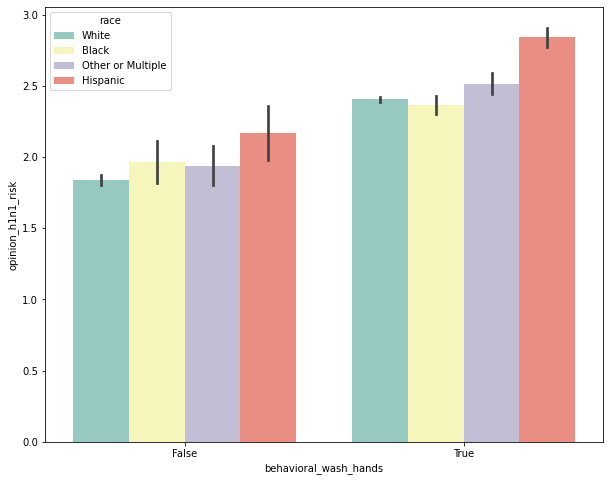

In [85]:
sns.barplot(data= d_fs,x = 'behavioral_wash_hands', y = 'opinion_h1n1_risk', 
            hue = 'race', palette = 'Set3')
plt.gcf().set_size_inches(10, 8)

Seasonal: washing hands behavior vs risk opinion

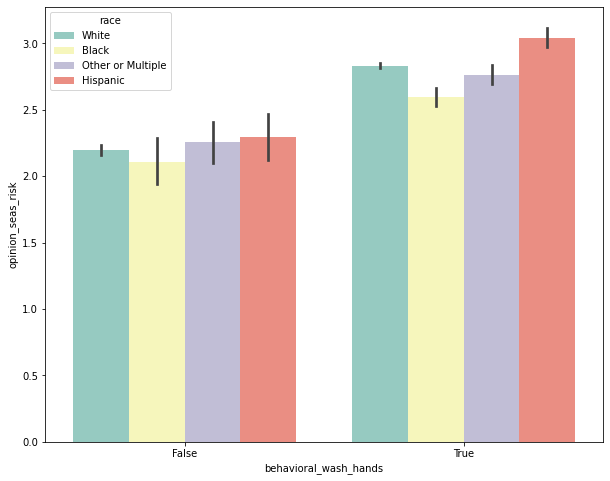

In [88]:
sns.barplot(data= d_fs,x = 'behavioral_wash_hands', y = 'opinion_seas_risk', 
            hue = 'race', palette = 'Set3')
plt.gcf().set_size_inches(10, 8)

H1N1: area and income

(metropolitan statistical areas)

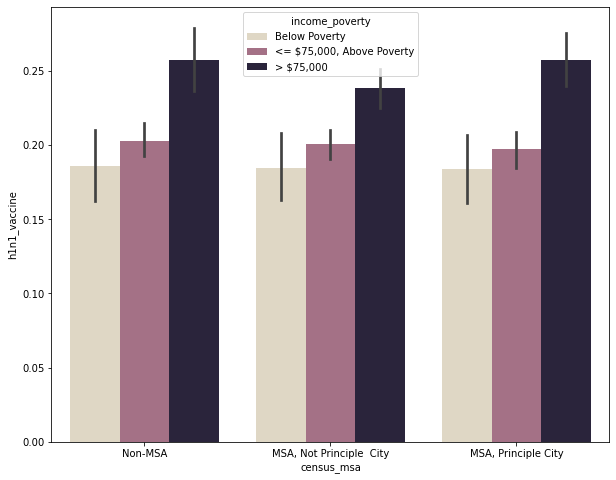

In [99]:
sns.barplot(data= d_fs,x = 'census_msa', y = 'h1n1_vaccine', 
            hue = 'income_poverty', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)

Seasonal: area and income
    
(metropolitan statistical areas)

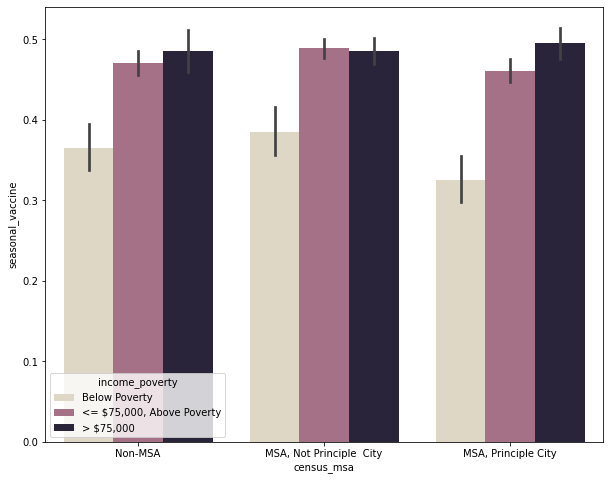

In [100]:
sns.barplot(data= d_fs,x = 'census_msa', y = 'seasonal_vaccine', 
            hue = 'income_poverty', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)